<a href="https://colab.research.google.com/github/Tejas-1505/Case_Studies/blob/main/Business_Case_Aerofit_Descriptive_Statistics_%26_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INTRODUCTION


Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

## Business Problwm

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

## About Data

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

## Features of the dataset:




**Product Purchased:** KP281, KP481, or KP781

**Age:**	In years

**Gender:**	Male/Female'

**Education:**	In years

**MaritalStatus:**	Single or partnered

**Usage:**	The average number of times the customer plans to use the treadmill each week.

**Income:**	Annual income (in $)

**Fitness:**	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

**Miles:**	The average number of miles the customer expects to walk/run each week


**Product Portfolio**

* The KP281 is an entry-level treadmill that sells for $1,500.

* The KP481 is for mid-level runners that sell for $1,750.

* The KP781 treadmill is having advanced features that sell for $2,500.

## 1. Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('aerofit_treadmill.txt')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.shape

(180, 9)

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


## Insights:


*   Age: The customers lie in the range between 18 years to 50 years with average of 29 years.
* Education: It lies between 12 to 21 years with average of 16 years.
* Usage: Customers use the treadmill between 2 to 7 hours with average of 4 hours
* Fitness: Average rating given by customers to the product is 3.
* Income: The customer base lies in the income range of 29562 to 104581 with average of around 53720
* Miles: The average miles covered by customers is 103 miles per week



In [ ]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


##Insights:


*   Saleswise the top product is KP281 according to last three months' data.
*  Based on the data more buyers are Males which is about 58%.
* According to given data 59 % of buyers are having partners and 41 % are single.



In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [ ]:
df.duplicated().value_counts()

,count
False,180


There are no duplicates in the data

## Adding new columns for better understandings of data

#### Age Column

- Categorizing the values in age column in 4 different buckets:

1. Young Adult: from 18 - 25
2. Adults: from 26 - 35
3. Middle Aged Adults: 36-45
4. Elder :46 and above

#### Education Column

- Categorizing the values in education column in 3 different buckets:

1. Primary Education: upto 12
2. Secondary Education: 13 to 15
3. Higher Education: 16 and above

#### Income Column

- Categorizing the values in Income column in 4 different buckets:

1. Low Income - Upto 40,000
2. Moderate Income - 40,000 to 60,000
3. High Income - 60,000 to 80,000
4. Very High Income - Above 80,000

#### Miles column

- Categorizing the values in miles column in 4 different buckets:

1. Light Activity - Upto 50 miles
2. Moderate Activity - 51 to 100 miles
3. Active Lifestyle - 101 to 200 miles
4. Fitness Enthusiast - Above 200 miles

In [ ]:

bin_range1 = [17,25,35,45,float('inf')]
bin_labels1 = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']

df['age_group'] = pd.cut(df['Age'],bins = bin_range1,labels = bin_labels1)

bin_range2 = [0,12,15,float('inf')]
bin_labels2 = ['Primary Education', 'Secondary Education', 'Higher Education']

df['edu_group'] = pd.cut(df['Education'],bins = bin_range2,labels = bin_labels2)

bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Moderate Income','High Income','Very High Income']

df['income_group'] = pd.cut(df['Income'],bins = bin_range3,labels = bin_labels3)

bin_range4 = [0,50,100,200,float('inf')]
bin_labels4 = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast ']

df['miles_group'] = pd.cut(df['Miles'],bins = bin_range4,labels = bin_labels4)

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity


# 2. Univariate Analysis

## 2.1 Product Sales Distribution

Text(0.5, 1.0, 'Product Sales Distribution')

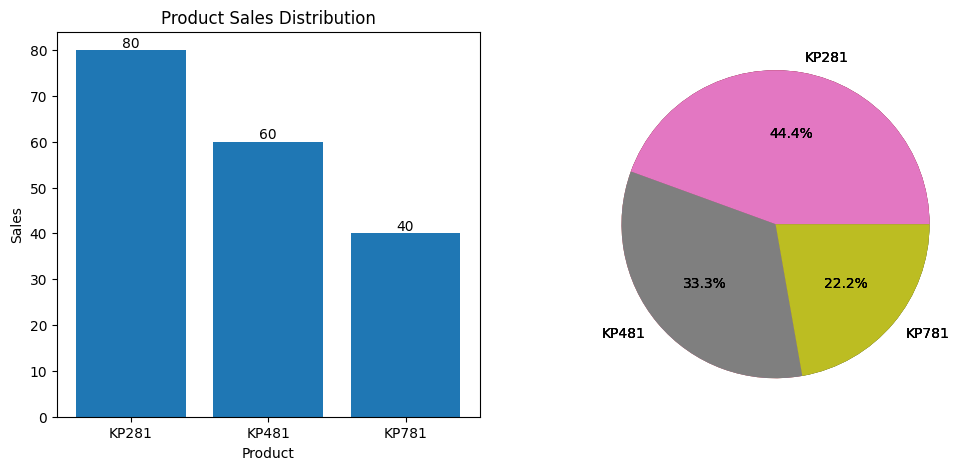

In [ ]:
# plot product vs sales as barplot
fig = plt.figure(figsize = (12,5))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax0.bar(df['Product'].value_counts().index,df['Product'].value_counts().values)

#for i in
for i in df['Product'].value_counts().index:
  ax0.text(i,df['Product'].value_counts()[i],df['Product'].value_counts()[i],ha='center',va='bottom')
  ax1.pie(df['Product'].value_counts(),labels = df['Product'].value_counts().index,autopct='%1.1f%%')

ax0.set_xlabel('Product')
ax0.set_ylabel('Sales')
ax0.set_title('Product Sales Distribution')

### Insights

- The KP281(entry level) treadmill model has the highest number of units sold, followed by the KP481 (mid-level) and KP781 (advanced) models.

## 2.2 Gender Distribution

Text(0.5, 1.0, 'Gender Distribution')

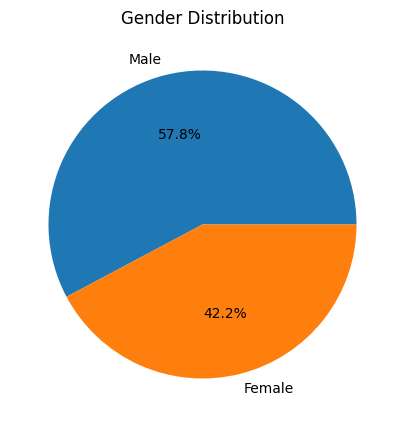

In [ ]:
# plot genderwise pie chart
plt.figure(figsize = (12,5))
plt.pie(df['Gender'].value_counts(),labels = df['Gender'].value_counts().index,autopct='%1.1f%%')
plt.title('Gender Distribution')


## 2.3 Marital Statuswise Distribution

Text(0.5, 1.0, 'Marital Statuswise Distribution')

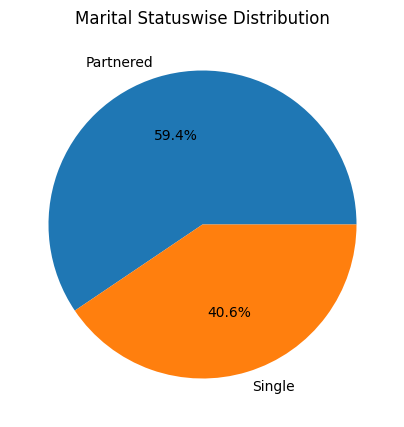

In [ ]:
plt.figure(figsize = (12,5))
plt.pie(df['MaritalStatus'].value_counts(),labels = df['MaritalStatus'].value_counts().index,autopct='%1.1f%%')
plt.title('Marital Statuswise Distribution')

## 2.4 Customer Fitness and Usage profile

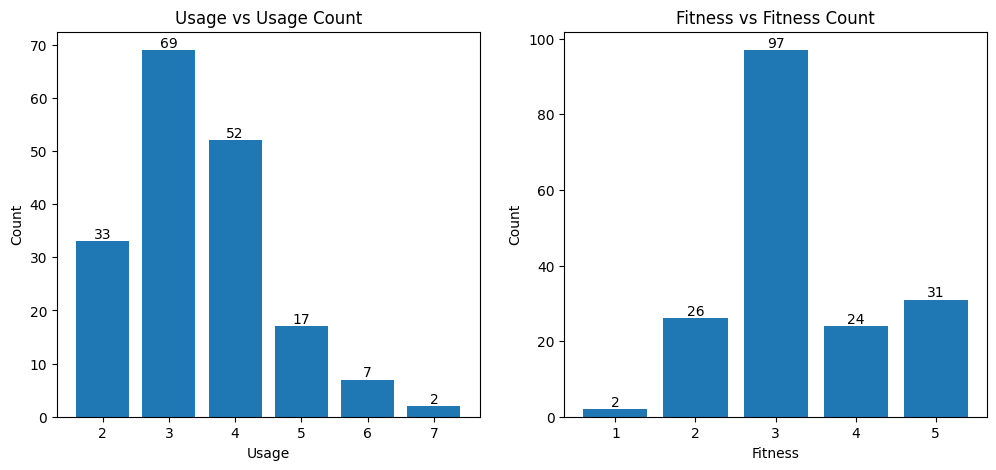

In [ ]:
# plot bar plot of usage per week vs usage count
fig = plt.figure(figsize = (12,5))

ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax0.bar(df['Usage'].value_counts().index,df['Usage'].value_counts().values)
for i in df['Usage'].value_counts().index:
  ax0.text(i,df['Usage'].value_counts()[i],df['Usage'].value_counts()[i],ha='center',va='bottom')
ax0.set_xlabel('Usage')
ax0.set_ylabel('Count')
ax0.set_title('Usage vs Usage Count')

ax1.bar(df['Fitness'].value_counts().index,df['Fitness'].value_counts().values)
for i in df['Fitness'].value_counts().index:
  ax1.text(i,df['Fitness'].value_counts()[i],df['Fitness'].value_counts()[i],ha='center',va='bottom')
ax1.set_xlabel('Fitness')
ax1.set_ylabel('Count')
ax1.set_title('Fitness vs Fitness Count')
plt.show()

### Insights

- Around 85% of the customers plan to use the treadmill for 2 to 4 times a week and only 15% using 5 times and above each week


- 54% of the customers have self-evaluated their fitness at a level 3 on a scale of 1 to 5. Furthermore, 84% of the total customers have rated themselves at 3 or higher, indicating commendable fitness levels.

## 2.5 Age Distribution

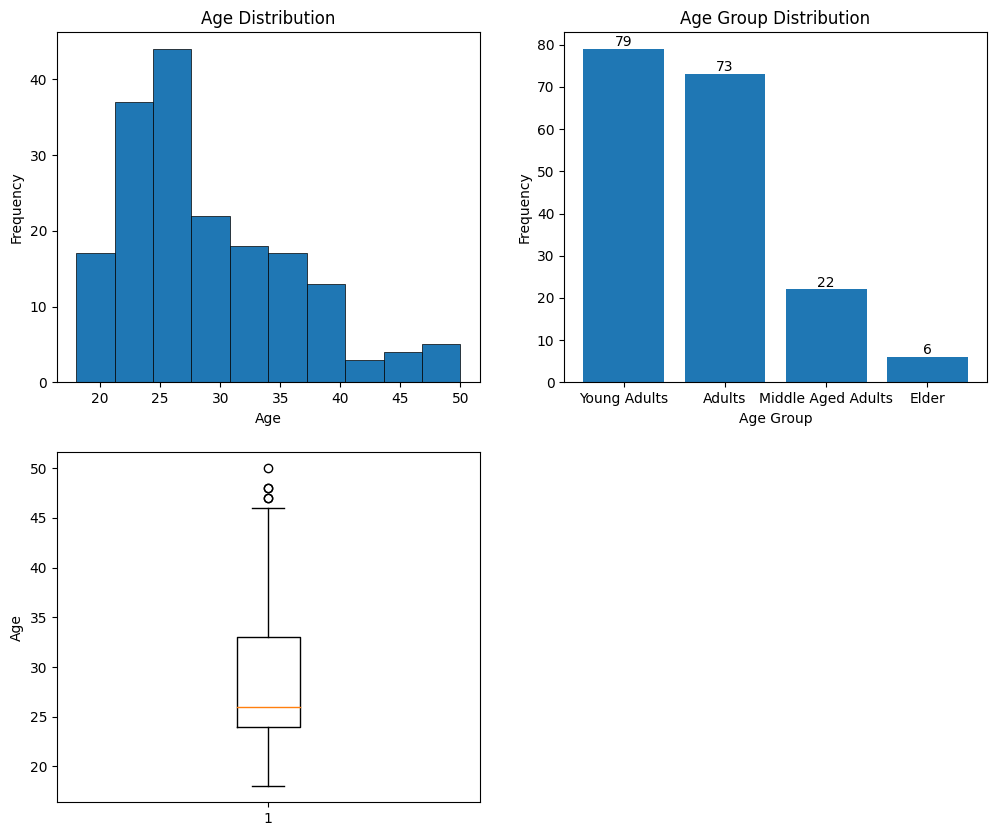

In [ ]:
# plot histogram of age vs frequency
fig = plt.figure(figsize = (12,10))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

ax0.hist(df['Age'],linewidth=0.5,edgecolor='black')
ax0.set_xlabel('Age')
ax0.set_ylabel('Frequency')
ax0.set_title('Age Distribution')

ax1.bar(df['age_group'].value_counts().index,df['age_group'].value_counts().values)
for i in df['age_group'].value_counts().index:
  ax1.text(i,df['age_group'].value_counts()[i],df['age_group'].value_counts()[i],ha='center',va='bottom')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Frequency')
ax1.set_title('Age Group Distribution')

ax2.boxplot(df['Age'])
ax2.set_ylabel('Age')


plt.show()

### Insights

- `85%` of the customers fall in the age range of `18 to 35`. with a median age of `26`, suggesting young people showing more interest in the companies products


- **Outliers**
    
     - There are `3 outlier's` present in the age data.

## 2.6 Customer Education Distribution

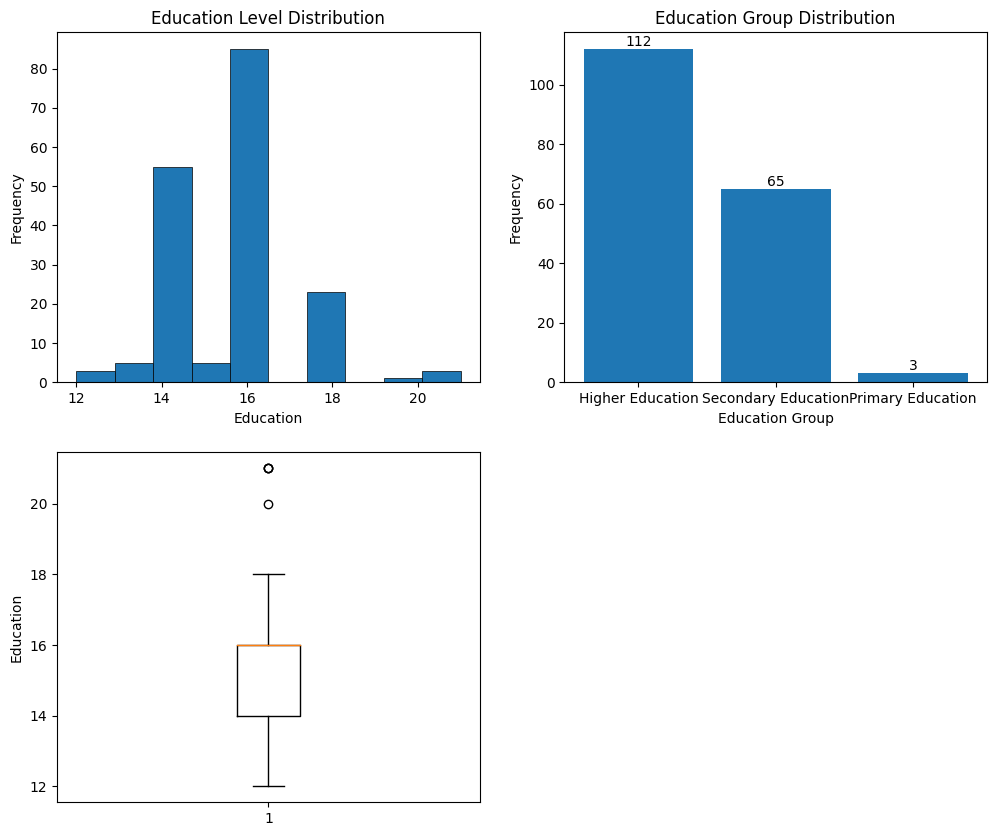

In [ ]:
fig = plt.figure(figsize = (12,10))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

ax0.hist(df['Education'],linewidth=0.5,edgecolor='black')
ax0.set_xlabel('Education')
ax0.set_ylabel('Frequency')

ax0.set_title('Education Level Distribution')

ax1.bar(df['edu_group'].value_counts().index,df['edu_group'].value_counts().values)
for i in df['edu_group'].value_counts().index:
  ax1.text(i,df['edu_group'].value_counts()[i],df['edu_group'].value_counts()[i],ha='center',va='bottom')
ax1.set_xlabel('Education Group')
ax1.set_ylabel('Frequency')
ax1.set_title('Education Group Distribution')

ax2.boxplot(df['Education'])
ax2.set_ylabel('Education')

plt.show()

### Insights

- 98% of the customers have education more than 13 years highlighting a strong inclination among well-educated individuals to purchase the products.


- **Outliers**
    
     - As we can see from the box plot, there are 2 outlier's present in the education data.

## 2.7 Customer Income Distribution

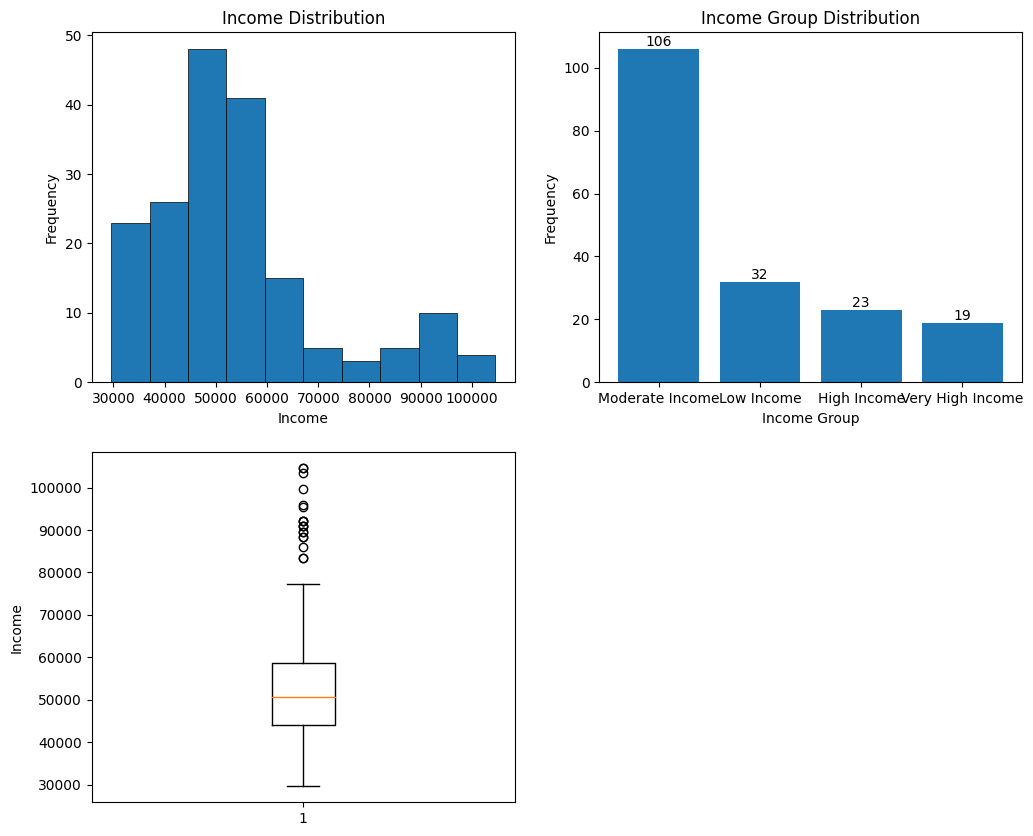

In [ ]:
fig = plt.figure(figsize = (12,10))

ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

ax0.hist(df['Income'],linewidth=0.5,edgecolor='black')
ax0.set_xlabel('Income')
ax0.set_ylabel('Frequency')

ax0.set_title('Income Distribution')

ax1.bar(df['income_group'].value_counts().index,df['income_group'].value_counts().values)
for i in df['income_group'].value_counts().index:
  ax1.text(i,df['income_group'].value_counts()[i],df['income_group'].value_counts()[i],ha='center',va='bottom')
ax1.set_xlabel('Income Group')
ax1.set_ylabel('Frequency')
ax1.set_title('Income Group Distribution')

ax2.boxplot(df['Income'])
ax2.set_ylabel('Income')

plt.show()

### Insights

- 60% of the customers fall in the income group of (40k to 60k) dollars suggesting higher inclination of this income group people towards the products.


- 18% of the customers fall in the income group of (<40) suggesting almost 77% of the total customers fall in income group of below 60k
- only 23% are in 60k and above income group


- **Outliers**
    
     - As we can see from the box plot, there are many outlier's present in the income data.

## 2.8 Customers' Weekly Mileage Expectations

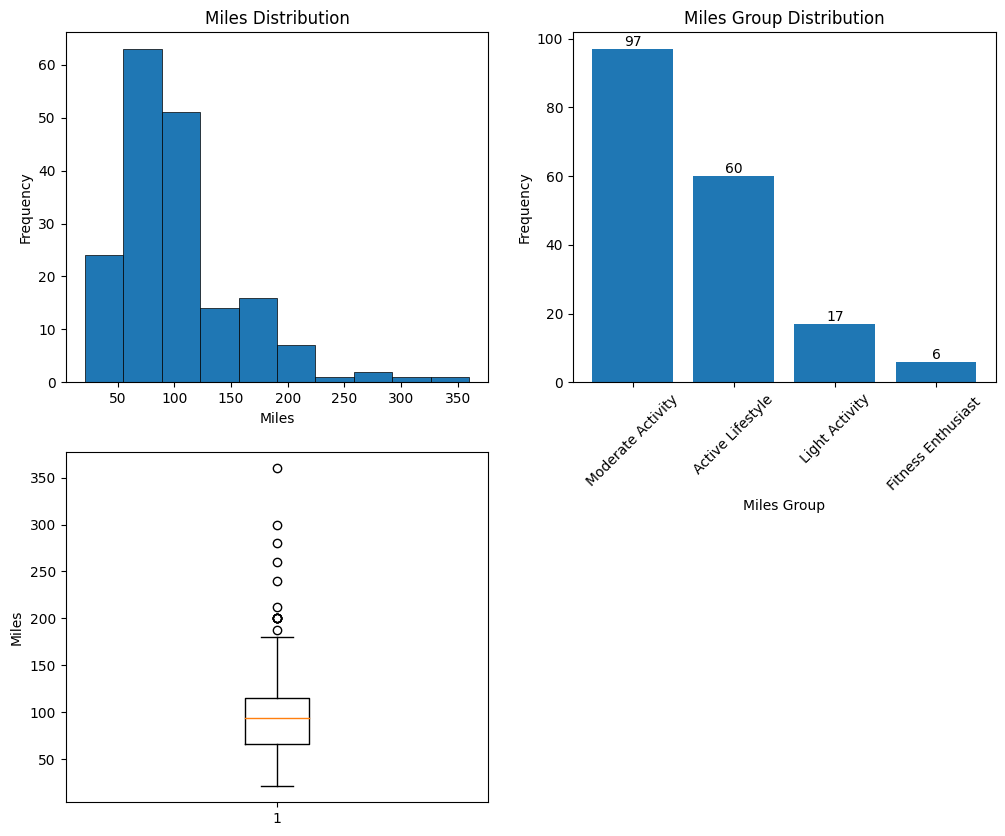

In [ ]:
fig = plt.figure(figsize = (12,10))

ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

ax0.hist(df['Miles'],linewidth=0.5,edgecolor='black')
ax0.set_xlabel('Miles')
ax0.set_ylabel('Frequency')
ax0.set_title('Miles Distribution')

ax1.bar(df['miles_group'].value_counts().index,df['miles_group'].value_counts().values)
for i in df['miles_group'].value_counts().index:
  ax1.text(i,df['miles_group'].value_counts()[i],df['miles_group'].value_counts()[i],ha='center',va='bottom')
ax1.set_xlabel('Miles Group')
ax1.set_ylabel('Frequency')
ax1.set_xticks(ticks=df['miles_group'].value_counts().index, labels=df['miles_group'].value_counts().index, rotation=45)
ax1.set_title('Miles Group Distribution')

ax2.boxplot(df['Miles'])
ax2.set_ylabel('Miles')

plt.show()



### Insights

- Almost 88% of the customers plans to use the treadmill for 50 to 200 miles per week with a median of94 miles per week`.


- **Outliers**
    
     - As we can see from the box plot, there are 8 outlier's present in the miles data.

# 3. Bivariate Analysis

## 3.1 Product Type

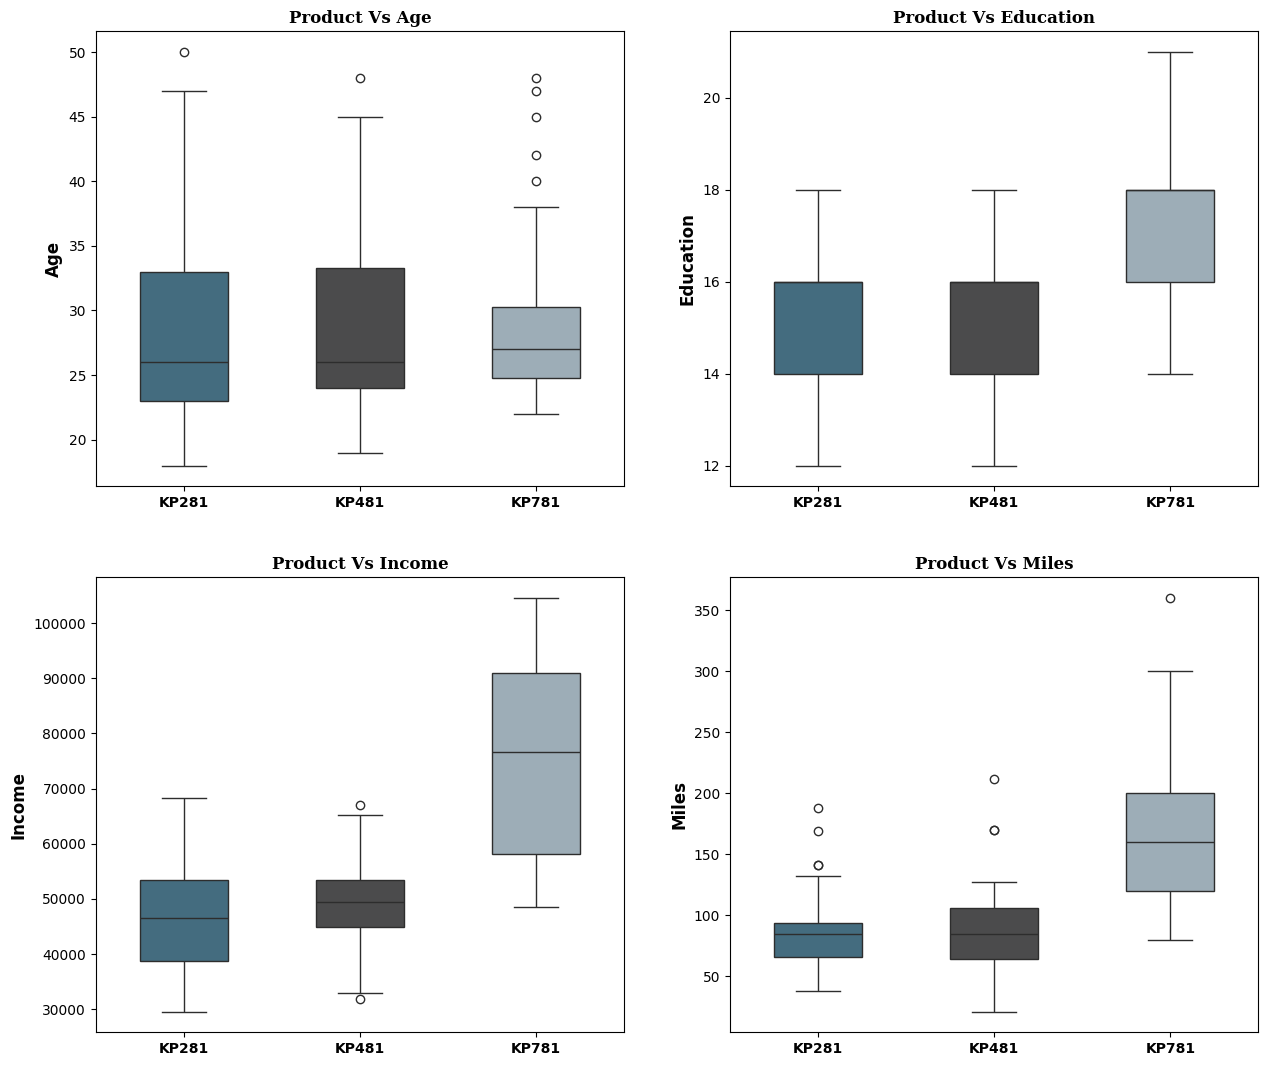

In [ ]:
fig = plt.figure(figsize = (15,13))
gs = fig.add_gridspec(2,2)

for i,j,k in [(0,0,'Age'),(0,1,'Education'),(1,0,'Income'),(1,1,'Miles')]:

    #plot position
    ax0 = fig.add_subplot(gs[i,j])

    #plot
    sns.boxplot(data = df, x = 'Product', y  = k ,ax = ax0,width = 0.5, palette =["#3A7089", "#4b4b4c",'#99AEBB'])

    #plot title
    ax0.set_title(f'Product Vs {k}',{'font':'serif', 'size':12,'weight':'bold'})

    #customizing axis
    ax0.set_xticklabels(df['Product'].unique(),fontweight = 'bold')
    ax0.set_ylabel(f'{k}',fontweight = 'bold',fontsize = 12)
    ax0.set_xlabel('')

plt.show()



## Insights:

It is clear from analysis that the prefered product is *KP781* among customers with higher education, higher income level, and intend to run 150 miles weekly.

## 3.2 Product preference across Age

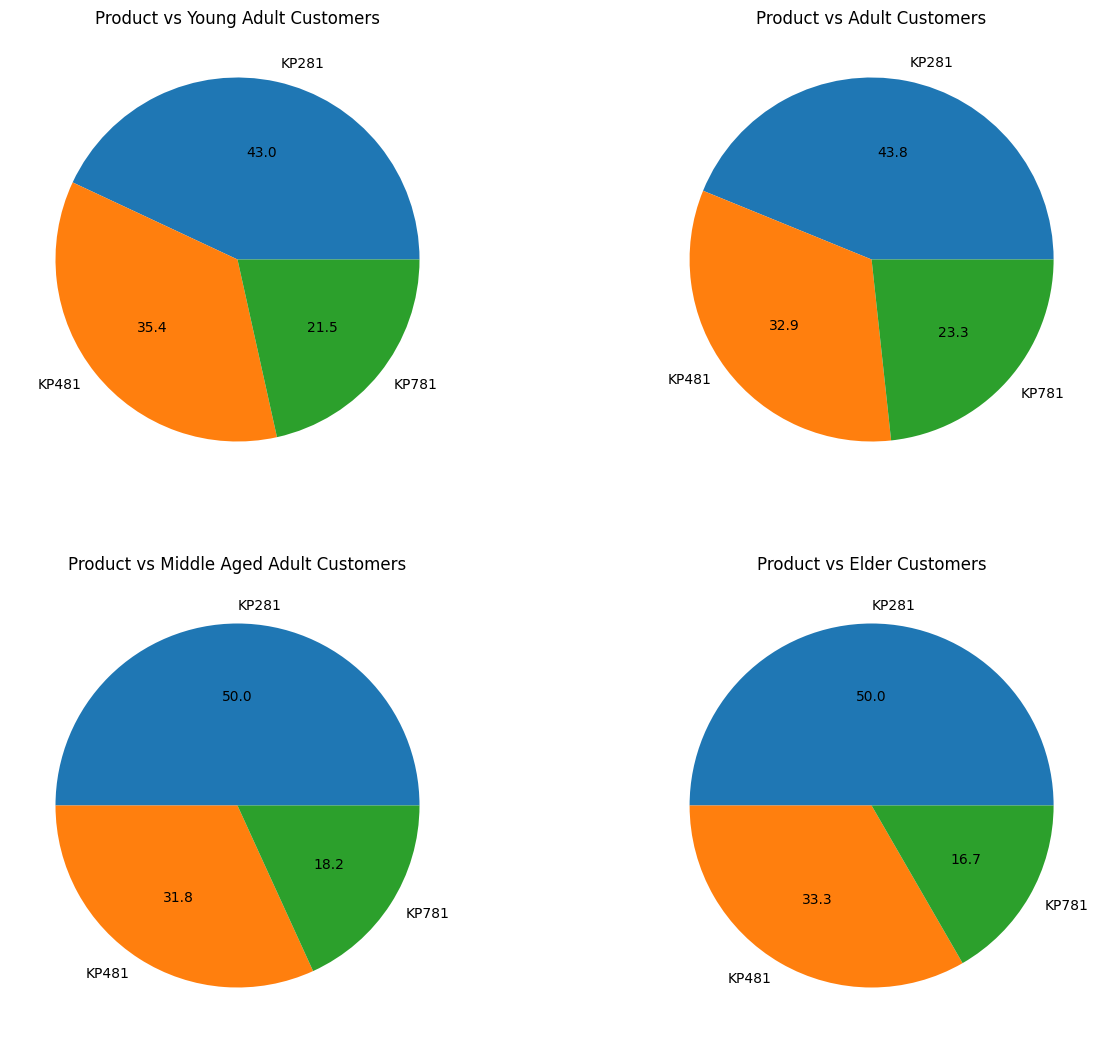

In [ ]:
# plot to analyse product preference across age groups
fig = plt.figure(figsize = (15, 13))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

ax0.pie(df[df['age_group'] == 'Young Adults']['Product'].value_counts(),labels = df['Product'].value_counts().index,autopct='%1.1f' )
ax0.set_title('Product vs Young Adult Customers')

ax1.pie(df[df['age_group'] == 'Adults']['Product'].value_counts(),labels = df['Product'].value_counts().index,autopct='%1.1f' )
ax1.set_title('Product vs Adult Customers')

ax2.pie(df[df['age_group'] == 'Middle Aged Adults']['Product'].value_counts(),labels = df['Product'].value_counts().index,autopct='%1.1f' )
ax2.set_title('Product vs Middle Aged Adult Customers')

ax3.pie(df[df['age_group'] == 'Elder']['Product'].value_counts(),labels = df['Product'].value_counts().index,autopct='%1.1f' )
ax3.set_title('Product vs Elder Customers')

plt.show()

## Insights:

The analysis of Product vs diffrent Age Groups show that *KP281* is popular choice among all age groups

## 3.3 Product Preference Across Education Level

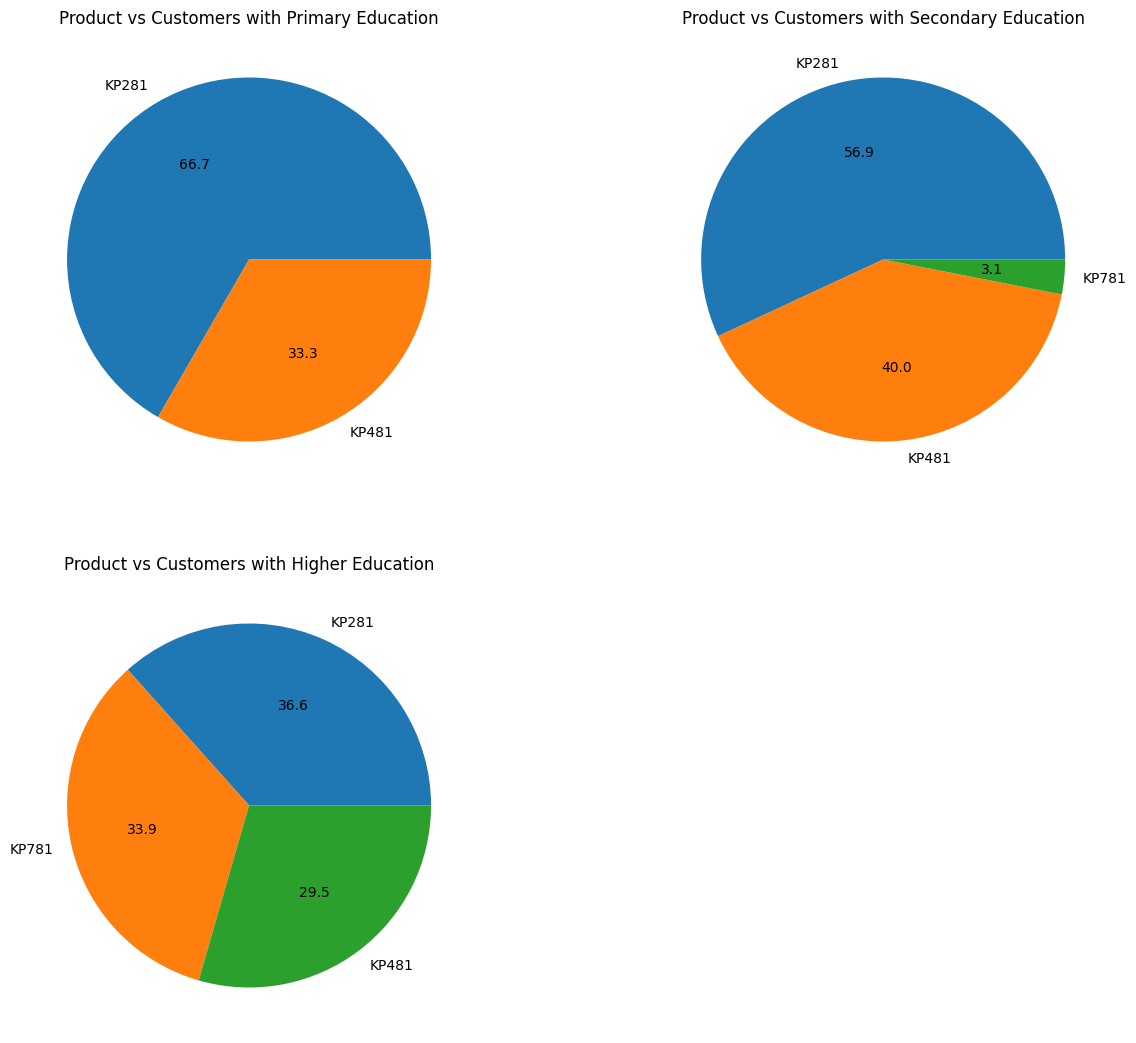

In [ ]:
fig = plt.figure(figsize = (15, 13))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

primary_edu_products = df[df['edu_group'] == 'Primary Education']['Product'].value_counts()
ax0.pie(primary_edu_products, labels=primary_edu_products.index, autopct='%1.1f')
ax0.set_title('Product vs Customers with Primary Education')

secondary_edu_products = df[df['edu_group'] == 'Secondary Education']['Product'].value_counts()
ax1.pie(secondary_edu_products, labels=secondary_edu_products.index, autopct='%1.1f')
ax1.set_title('Product vs Customers with Secondary Education')

higher_edu_products = df[df['edu_group'] == 'Higher Education']['Product'].value_counts()
ax2.pie(higher_edu_products, labels=higher_edu_products.index, autopct='%1.1f')
ax2.set_title('Product vs Customers with Higher Education')

plt.show()

## Insights:



*   It is visible from above analysis that highly educated people chose KP281 and KP781 in equal distribution over other model
* Where as other two groups of customers gave preference to *KP281* only



## 3.4 Product preference according to Income Groups

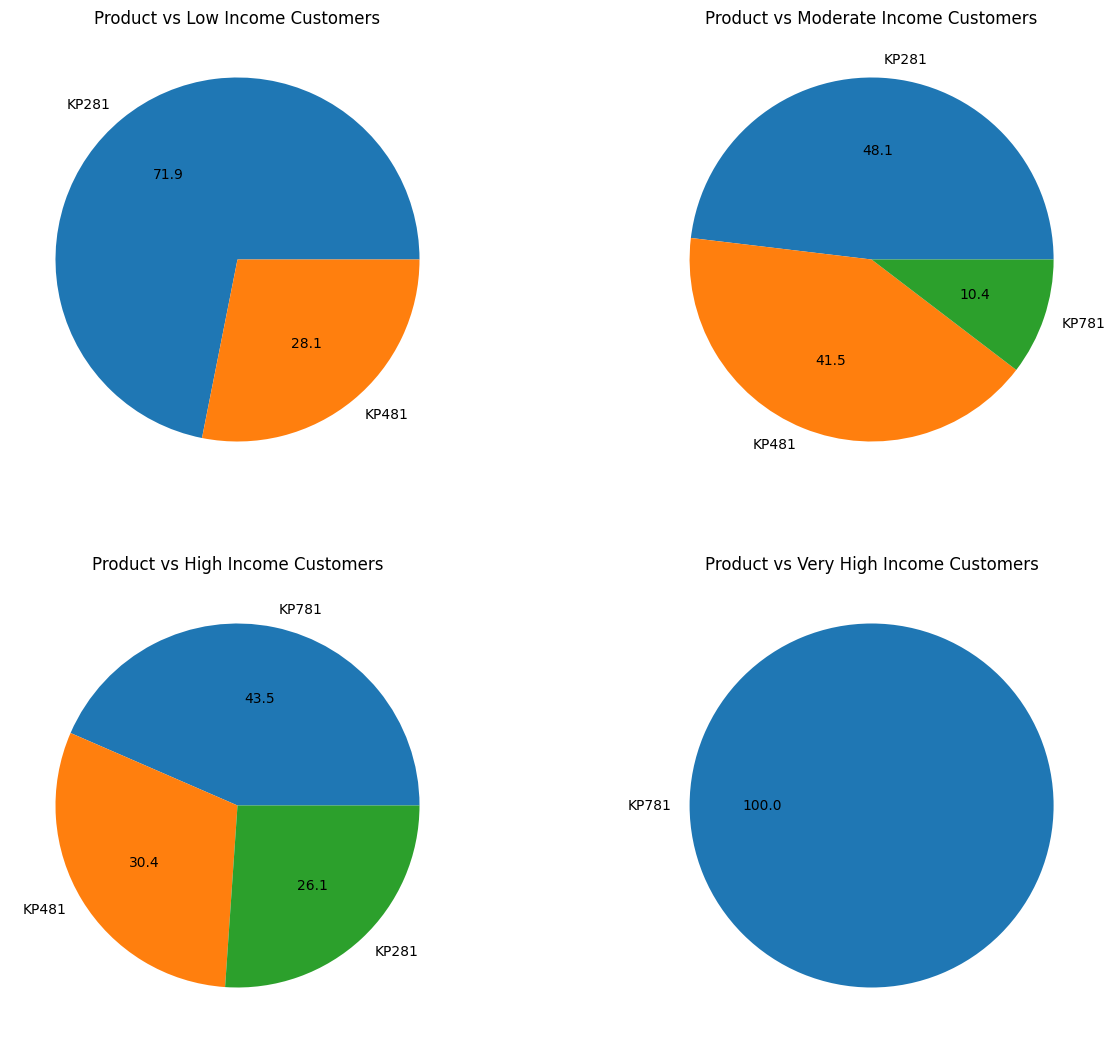

In [ ]:
fig = plt.figure(figsize = (15, 13))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

# Filter and get value counts + index for labels within each income group
low_income_products = df[df['income_group'] == 'Low Income']['Product'].value_counts()
ax0.pie(low_income_products, labels = low_income_products.index, autopct='%1.1f') # Use labels from the low_income_products Series
ax0.set_title('Product vs Low Income Customers')

moderate_income_products = df[df['income_group'] == 'Moderate Income']['Product'].value_counts()
ax1.pie(moderate_income_products, labels = moderate_income_products.index, autopct='%1.1f')
ax1.set_title('Product vs Moderate Income Customers')

high_income_products = df[df['income_group'] == 'High Income']['Product'].value_counts()
ax2.pie(high_income_products, labels = high_income_products.index, autopct='%1.1f')
ax2.set_title('Product vs High Income Customers')

very_high_income_products = df[df['income_group'] == 'Very High Income']['Product'].value_counts()
ax3.pie(very_high_income_products, labels = very_high_income_products.index, autopct='%1.1f')
ax3.set_title('Product vs Very High Income Customers')

plt.show()

## Insights


*   The analysis shows that customers with very high income give prefernce only to *KP781* model
* Likewise highest proportion of high income customers also chose *KP781*
* On the other hand *KP281* is popular choice among low and moderate income customers




## 3.5 Product Preference across Gender

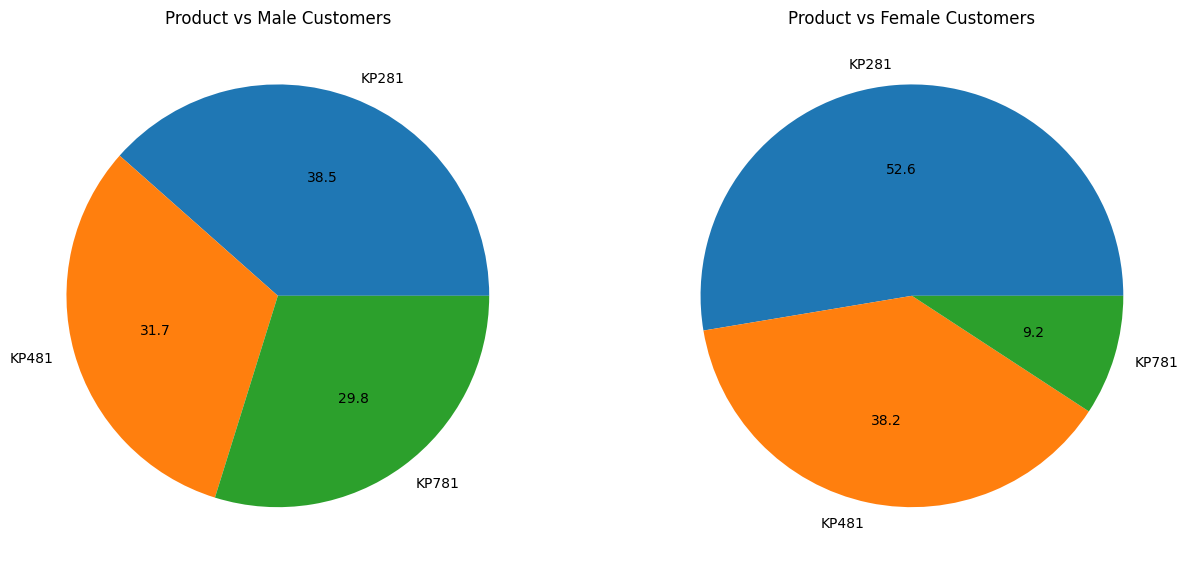

In [ ]:
fig = plt.figure(figsize = (15, 13))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax0.pie(df[df['Gender'] == 'Male']['Product'].value_counts(),labels = df['Product'].value_counts().index,autopct='%1.1f' )
ax0.set_title('Product vs Male Customers')

ax1.pie(df[df['Gender'] == 'Female']['Product'].value_counts(),labels = df['Product'].value_counts().index,autopct='%1.1f' )
ax1.set_title('Product vs Female Customers')

plt.show()

# 4. Computing Probability - Marginal, Conditional Probability

## 4.1 Probability of product purchase w.r.t. gender

In [ ]:
pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


### Insights

1. The Probability of a treadmill being purchased by a female is 42%.

    - The conditional probability of purchasing the treadmill model given that the customer is female is
    
        - For Treadmill model KP281 - **22%**
    
        - For Treadmill model KP481 - **16%**
    
        - For Treadmill model KP781 - **4%**


2. The Probability of a treadmill being purchased by a male is 58%.

    - The conditional probability of purchasing the treadmill model given that the customer is male is -

        - For Treadmill model KP281 - **22%**
    
        - For Treadmill model KP481 - **17%**
    
        - For Treadmill model KP781 - **18%**

## 4.2 Probability of product purchase w.r.t. Age

In [ ]:
pd.crosstab(index =df['Product'],columns = df['age_group'],margins = True,normalize = True ).round(2)

age_group,Young Adults,Adults,Middle Aged Adults,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


### Insights

1. The Probability of a treadmill being purchased by a Young Adult(18-25) is 44%.

    - The conditional probability of purchasing the treadmill model given that the customer is Young Adult is
    
        - For Treadmill model KP281 - **19%**
    
        - For Treadmill model KP481 - **16%**
    
        - For Treadmill model KP781 - **9%**


2. The Probability of a treadmill being purchased by a Adult(26-35) is 41%.

    - The conditional probability of purchasing the treadmill model given that the customer is Adult is -

        - For Treadmill model KP281 - **18%**
    
        - For Treadmill model KP481 - **13%**
    
        - For Treadmill model KP781 - **9%**
        
        
3. The Probability of a treadmill being purchased by a Middle Aged(36-45) is 12%.
        
        
4. The Probability of a treadmill being purchased by a Elder(Above 45) is only 3%.

## 4.3 Probability of product purchase w.r.t. Education level

In [ ]:
pd.crosstab(index =df['Product'],columns = df['edu_group'],margins = True,normalize = True ).round(2)

edu_group,Primary Education,Secondary Education,Higher Education,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


### Insights

1. The *Probability of a treadmill being purchased by a customer with Higher Education(Above 15 Years) is 62%.

    - The conditional probability of purchasing the treadmill model given that the customer has Higher Education is
    
        - For Treadmill model KP281 - **23%**
    
        - For Treadmill model KP481 - **18%**
    
        - For Treadmill model KP781 - **21%**


2. The Probability of a treadmill being purchased by a customer with Secondary Education(13-15 yrs) is 36%.

    - The conditional probability of purchasing the treadmill model given that the customer has Secondary Education is -

        - For Treadmill model KP281 - **21%**
    
        - For Treadmill model KP481 - **14%**
    
        - For Treadmill model KP781 - **1%**
        
        
3. The Probability of a treadmill being purchased by a customer with Primary Education(0 to 12 yrs) is only 2%.

## 4.4 Probability of product purchase w.r.t. Income

In [ ]:
pd.crosstab(index =df['Product'],columns = df['income_group'],margins = True,normalize = True ).round(2)

income_group,Low Income,Moderate Income,High Income,Very High Income,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


### Insights

1. The Probability of a treadmill being purchased by a customer with Low Income(<40k) is 18%.

    - The conditional probability of purchasing the treadmill model given that the customer has Low Income is  -
        - For Treadmill model KP281 - **13%**
    
        - For Treadmill model KP481 - **5%**
    
        - For Treadmill model KP781 - **0%**
        
        
2. The Probability of a treadmill being purchased by a customer with Moderate Income(40k - 60k) is 59%

    - The conditional probability of purchasing the treadmill model given that the customer has Moderate Income is  -
        - For Treadmill model KP281 - **28%**
    
        - For Treadmill model KP481 - **24%**
    
        - For Treadmill model KP781 - **6%**
        

3. The Probability of a treadmill being purchased by a customer with High Income(60k - 80k) is 13%

    - The conditional probability of purchasing the treadmill model given that the customer has High Income is  -
    
        - For Treadmill model KP281 - **3%**
    
        - For Treadmill model KP481 - **4%**
    
        - For Treadmill model KP781 - **6%**
        
        
4. The Probability of a treadmill being purchased by a customer with Very High Income(>80k) is 11%

    - The conditional probability of purchasing the treadmill model given that the customer has High Income is  -
    
        - For Treadmill model KP281 - **0%**
    
        - For Treadmill model KP481 - **0%**
    
        - For Treadmill model KP781 - **11%**
        

## 4.5 Probability of product purchase w.r.t. Weekly Usage

In [ ]:
pd.crosstab(index =df['Product'],columns = df['Usage'],margins = True,normalize = True ).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


### Insights

1. The Probability of a treadmill being purchased by a customer with Usage 3 per week is 38%.

    - The conditional probability of purchasing the treadmill model given that the customer has Usage 3 per week is  -
        - For Treadmill model KP281 - **21%**
    
        - For Treadmill model KP481 - **17%**
    
        - For Treadmill model KP781 - **1%**
        
        
2. The Probability of a treadmill being purchased by a customer with Usage 4 per week is 29%.

    - The conditional probability of purchasing the treadmill model given that the customer has Usage 4 per week is  -
        - For Treadmill model KP281 - **12%**
    
        - For Treadmill model KP481 - **7%**
    
        - For Treadmill model KP781 - **10%**

3. The Probability of a treadmill being purchased by a customer with Usage 2 per week is 18%

    - The conditional probability of purchasing the treadmill model given that the customer has Usage 2 per week is  -
        - For Treadmill model KP281 - **11%**
    
        - For Treadmill model KP481 - **8%**
    
        - For Treadmill model KP781 - **0%**
        


## 4.6 Probability of product purchase w.r.t. Mileage

In [ ]:
pd.crosstab(index =df['Product'],columns = df['miles_group'],margins = True,normalize = True ).round(2)

miles_group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00


### 🔍 Insights

1. The Probability of a treadmill being purchased by a customer with lifestyle of Light Activity(0 to 50 miles/week) is 9%.

    - The conditional probability of purchasing the treadmill model given that the customer has Light Activity Lifestyle is  -
        
        - For Treadmill model KP281 - **7%**
    
        - For Treadmill model KP481 - **3%**
    
        - For Treadmill model KP781 - **0%**
        
        
2. The Probability of a treadmill being purchased by a customer with lifestyle of Moderate Activity(51 to 100 miles/week) is 54%.

    - The conditional probability of purchasing the treadmill model given that the customer with lifestyle of Moderate Activity is  -
        - For Treadmill model KP281 - **28%**
    
        - For Treadmill model KP481 - **22%**
    
        - For Treadmill model KP781 - **4%**
        

2. The Probability of a treadmill being purchased by a customer has Active Lifestyle(100 to 200 miles/week) is 33%.

    - The conditional probability of purchasing the treadmill model given that the customer has Active Lifestyle is  -
        - For Treadmill model KP281 - **10%**
    
        - For Treadmill model KP481 - **8%**
    
        - For Treadmill model KP781 - **15%**
        
        
4. The Probability of a treadmill being purchased by a customer who is Fitness Enthusiast(>200 miles/week) is 3% only
        

## 4.7 Probability of product purchase w.r.t. Marital Status

In [ ]:
pd.crosstab(index =df['Product'],columns = df['MaritalStatus'],margins = True,normalize = True ).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


### Insights

1. The Probability of a treadmill being purchased by a Married Customer is 59%`.

    - The conditional probability of purchasing the treadmill model given that the customer is Married is
    
        - For Treadmill model KP281 - **27%**
    
        - For Treadmill model KP481 - **20%**
    
        - For Treadmill model KP781 - **13%**


2. The Probability of a treadmill being purchased by a Unmarried Customer is 41%.

    - The conditional probabilityof purchasing the treadmill model given that the customer is Unmarried is -

        - For Treadmill model KP281 - **18%**
    
        - For Treadmill model KP481 - **13%**
    
        - For Treadmill model KP781 - **9%**

## 4.8 Probability of product purchase w.r.t. Fitness

In [ ]:
pd.crosstab(index =df['Product'],columns = df['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


### Insights

1. The Probability of a treadmill being purchased by a customer with Average(3) Fitness is 54%.

    - The conditional probability of purchasing the treadmill model given that the customer has Average Fitness is  -
        - For Treadmill model KP281 - **30%**
    
        - For Treadmill model KP481 - **22%**
    
        - For Treadmill model KP781 - **2%**
        

2. The Probability of a treadmill being purchased by a customer with Fitness of 2,4,5 is almost 15%.


3. The Probability of a treadmill being purchased by a customer with very low(1) Fitness is only 1%.

# 5. Corelation between variables

## 5.1 Pairplot

In [ ]:
import copy
df_copy = copy.deepcopy(df)

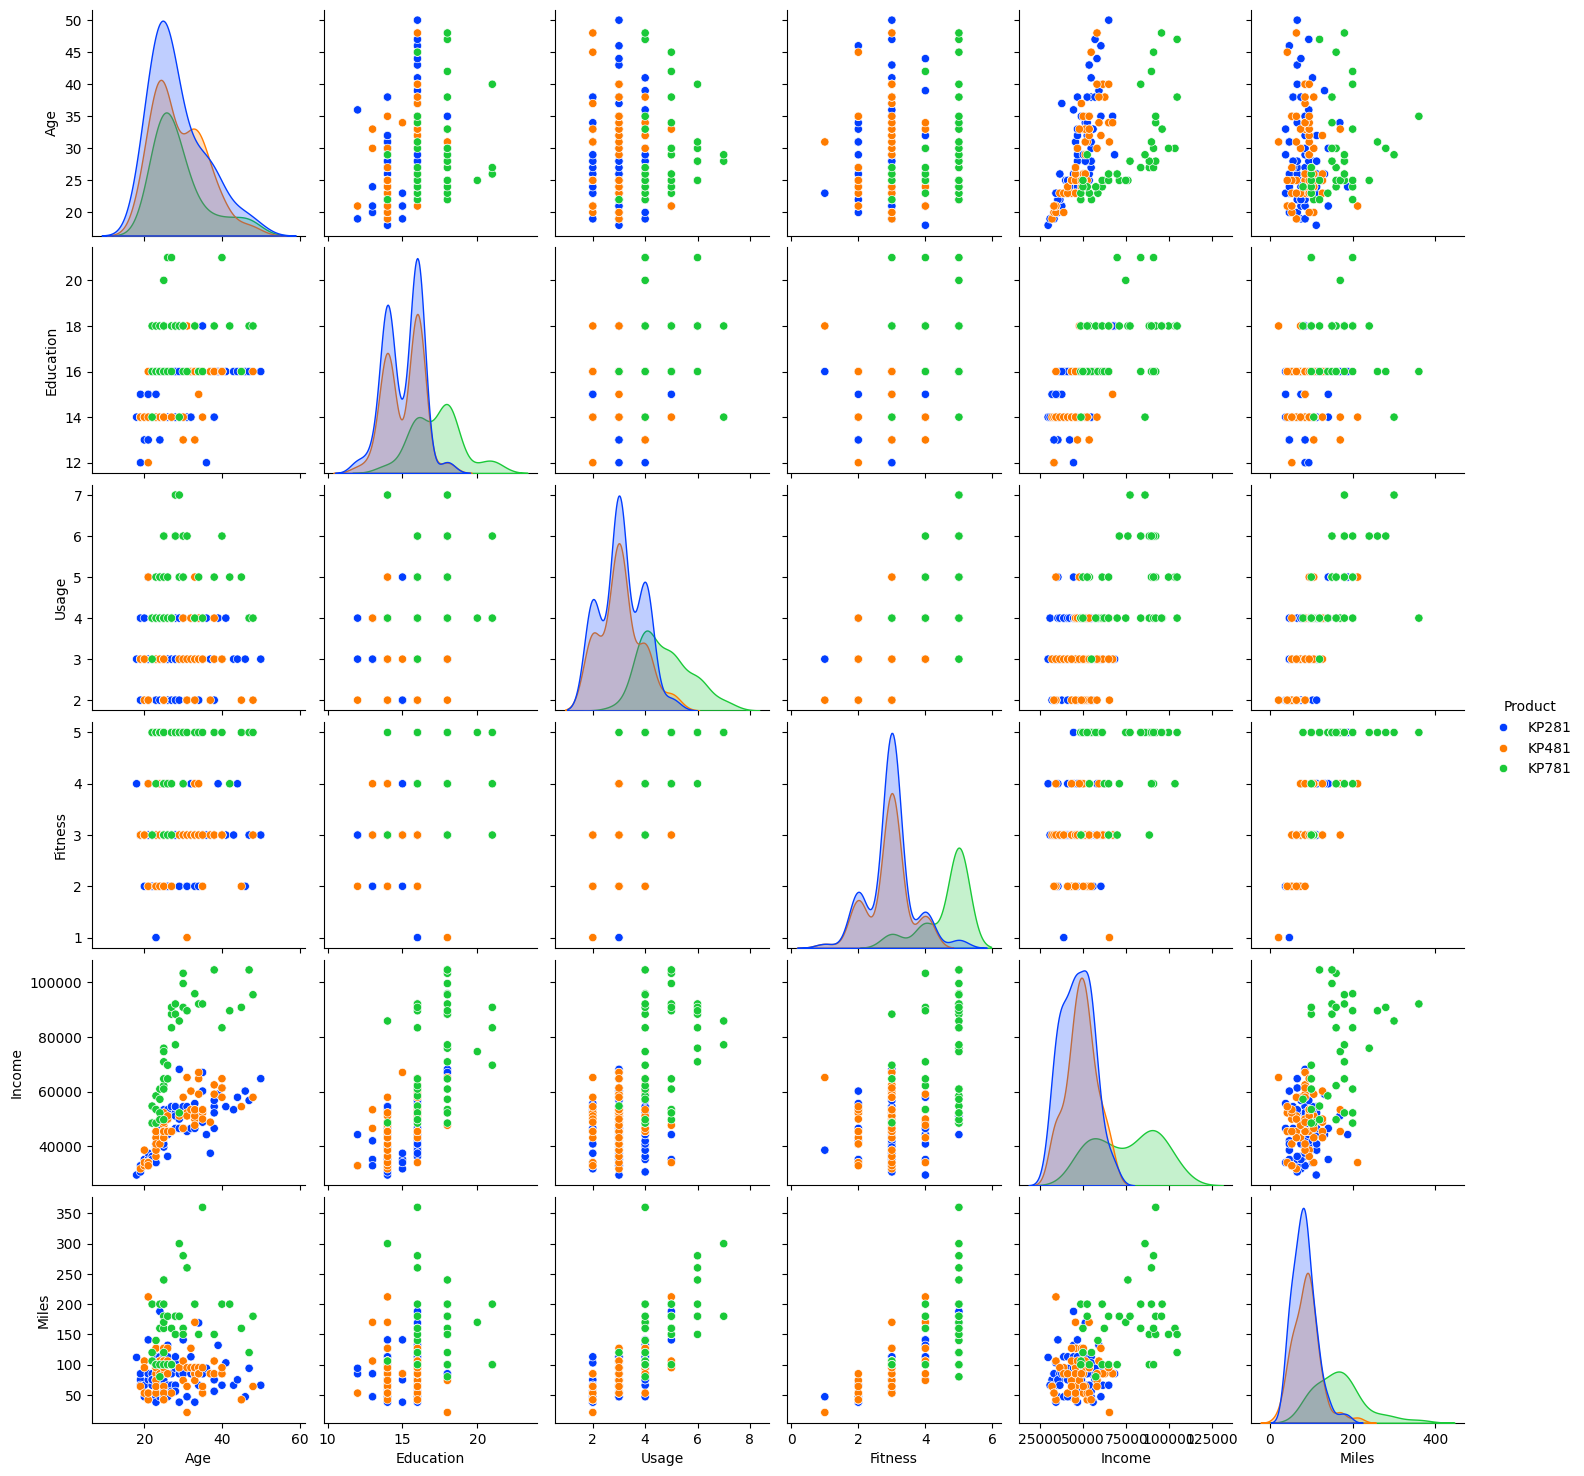

In [ ]:
sns.pairplot(df_copy, hue = 'Product', palette= 'bright')
plt.show()

## 5.2 Heatmap

In [ ]:
df_copy['Usage'] = df_copy['Usage'].astype('int')
df_copy['Fitness'] = df_copy['Fitness'].astype('int')

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    object  
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   age_group      180 non-null    category
 10  edu_group      180 non-null    category
 11  income_group   180 non-null    category
 12  miles_group    180 non-null    category
dtypes: category(4), int64(6), object(3)
memory usage: 14.2+ KB


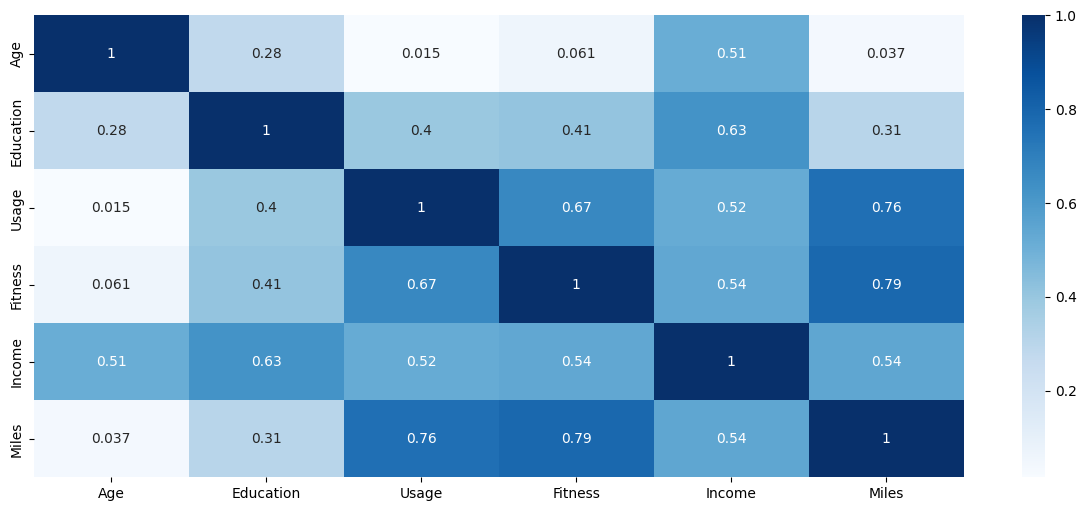

In [ ]:
numerical_cols = df_copy.select_dtypes(include=['number'])
corr_mat = numerical_cols.corr()

plt.figure(figsize=(15,6))
sns.heatmap(corr_mat,annot = True, cmap="Blues")
plt.show()

### Insights


- From the pair plot we can see positive correlation between Age and Income and heatmap also suggests a strong correlation betwwen them



- Education and Income are highly correlated as its obvious. Eductation also has significatnt correlation between Fitness rating and Usage of the treadmill.



- Usage is highly correlated with Fitness and Miles.

# 6. Customer Profiling

Based on above analysis

- Probability of purchase of KP281 = 44%
- Probability of purchase of KP481 = 33%
- Probability of purchase of KP781 = 22%


- Customer Profile for **KP281** Treadmill:

    - Age: mainly between 18 to 35 years  with few between 35 to 50 years
    - Education level: 13 years and above
    - Annual Income: below USD 60,000
    - Weekly Usage - 2 to 4 times
    - Fitness Scale - 2 to 4
    - Weekly Running Mileage - 50 to 100 miles
    
    
- Customer Profile for KP481 Treadmill:

    - Age: mainly between 18 to 35 years  with few between 35 to 50 years
    - Education level: 13 years and above
    - Annual Income: between USD 40,000 to USD 80,000
    - Weekly Usage - 2 to 4 times
    - Fitness Scale - 2 to 4
    - Weekly Running Mileage - 50 to 200 miles


- Customer Profile for KP781 Treadmill:

    - Gender - Male
    - Age: between 18 to 35 years
    - Education level: 15 years and above
    - Annual Income: USD 80,000 and above
    - Weekly Usage - 4 to 7 times
    - Fitness Scale - 3 to 5
    - Weekly Running Mileage - 100 miles and above

# 7. Recommendations


- The **KP781** model has a significant sales diversity in terms of gender, with only 18% of total sales to female customers. To improve this, it is recommended to implement targeted strategies such as offering special promotions and trials exclusively designed for the female customers.


- Considering the target customer's age, education level, and income, it's important to offer the **KP281 and KP481** Treadmill at an affordable price point. Also,providing flexible payment plans that allow customers to spread the cost over several months. This can make the treadmill more accessible to customers with different levels of budgets.


- Create a user-friendly app that syncs with the treadmill that could track users' weekly running mileage, provide real-time feedback on their progress, and offer personalized recommendations for workouts based on their fitness scale and goals.This  can improve the overall treadmill experience.